# Importing Data through read_csv

In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/saimi/OneDrive/Desktop/swiggydataset.csv")
df.sample(10)

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
11806,07-01-2019 15:09,0,6,150,@swiggy_in @SwiggyCares and now after such lon...,0,False,PendyalaAjit,"11,807","11,19,16,00,00,00,00,00,000"
1434,6/20/2019 14:37,0,57,42,@SwiggyCares @swiggy_in @ZomatoIN @Zomato You ...,0,False,ClaranceDsilva,"1,435","82,89,01,004"
16227,07-05-2019 16:05,0,169,179,@SwiggyCares Is your App down ?,0,False,_anish_mohan,"16,228","7,92,35,90,00,00,00,00,000"
11241,7/15/2019 17:31,0,0,28,First the chat support denied her for the refu...,0,False,RohitSh49822056,"11,242","11,44,90,00,00,00,00,00,000"
1089,6/22/2019 13:51,0,6915,3091,@swiggy_in Your delivery charges are too much....,0,False,outofthewoodmp3,"1,090","9,88,45,50,00,00,00,00,000"
11759,07-01-2019 16:08,0,334,1512,@nitinjain_nitin @SwiggyCares @swiggy_in @mvd_...,0,False,MasterSwami,"11,760","1,77,55,826"
7968,06-01-2019 11:24,0,1061,1657,@SwiggyCares @venkatesh5117 That's their stand...,0,NaN,SandipThink,"7,969","52,28,72,786"
15115,07-06-2019 17:03,0,530,86,@SwiggyCares @swiggy_in Why the food quality i...,0,False,TraderMicro,"15,116","7,77,82,70,00,00,00,00,000"
5797,6/16/2019 18:00,0,8,95,@swiggy_in \n Puri duniya ka bewakoof bana rak...,0,False,rahul9209,"5,798","3,31,89,56,281"
14671,07-12-2019 18:07,0,803,292,@SwiggyCares Why are you not sharing email det...,0,False,bachPunn,"14,672","12,16,23,930"


# Creating a Dictionary

In [3]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

nltk.download('opinion_lexicon')
nltk.download('punkt')

pos_score = 1
neg_score = -1
word_dict = {}

for word in opinion_lexicon.positive():
    word_dict[word] = pos_score

for word in opinion_lexicon.negative():
    word_dict[word] = neg_score


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# BingLiuScore

## Function to do the math

In [4]:
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        sentiment_score += word_dict.get(word, 0)
    return sentiment_score


In [7]:
df['Bing_Liu_Score'] = df['full_text'].apply(bing_liu_score)


In [33]:
df[['full_text', 'Bing_Liu_Score']].head(10)

,full_text,Bing_Liu_Score
0,@Mahi_2510 @swiggy_in The ultimate answer will...,0
1,@SwiggyCares I hope so.,0
2,@SwiggyCares I think you have the order detail...,1
3,"@swiggy_in People are complaining here also, i...",-2
4,@SwiggyCares Do you even know the meaning of y...,1
5,"Nothing new, they had the most shittiest assoc...",0
6,@swiggy_in \n @SwiggyCares \n I am the owner o...,-1
7,@SwiggyCares Inbox check kare huzoor,0
8,@SwiggyCares Pls go through the details and so...,0
9,I hope you hire educated professionals @swiggy...,1


In [11]:
df.groupby('full_text').agg({'Bing_Liu_Score':'mean'})

,Bing_Liu_Score
full_text,
"""@SwiggyCares""\n ""Nope, it doesn't.""",0.0
"""All this aftr waiting for 40 mins at 2 AM in the nite when I was super hungry &amp; when you guys were supposed to be my Hunger Saviors,oh wait that's Swiggy, I shud hav trusted them more &amp; ordered on their platform."" @SwiggyCares I even used you guys as reference for relief..Alas!",3.0
"""We have broadened our ambitions in Food Delivery, which is an exciting, meaningful and rapidly transforming opportunity fuelled by a significant reallocation of consumer spending to this growing sector,"" Basil Sgourdos, CFO @Naspers @swiggy_in @harshamjty - @ETtech",3.0
"#1 Dear @Zomato @zomatocare @ZomatoIN please learn some politeness and authenticity from your competitor @swiggy_in @SwiggyCares. I have ordered food Today and by mistake kept my work location instead of Home address, and even though delivery person left to deliver the order...",1.0
#45297300507...Go through the chat.....it was mentioned that the delivery boy put the order in a cycle....@SwiggyCares https://t.co/PSRObirWRo,0.0
...,...
"ðŸ¤£ðŸ¤£ðŸ¤£ðŸ¤£ðŸ¤£ No words i swear ,you guys are soo cute n innocent (chewtiya hum bol nahi saktay toh innocent he sahi ) @swiggy_in WTF you guys doing.. # https://t.co/oBZ1cpiiW8",0.0
ðŸš€Excited to announce the panel discussion for #GROWTHMIXER Bengaluru. Learn the secrets of improving #customerretention and loyalty from top hats of the city. âš¡Save your spot https://t.co/oAAP0LdWWv @ishanbose31 @LiciousFoods @sdhskr @meeshoapp @swiggy_in @anujrathi @AppsFlyer https://t.co/k5OChKWfSz,3.0
ðŸ˜ðŸ˜‹\n #Food #Swiggy #Zomato #AlwaysHungry @swiggy_in @ZomatoIN https://t.co/4HZC1wuZAl,0.0


# Install Afinn for Afinn Score

In [14]:
from afinn import Afinn
afinn = Afinn()

# Apply AFINN sentiment scoring
df['AFINN_Score'] = df['full_text'].apply(afinn.score)


In [31]:
df[['full_text', 'AFINN_Score']].head(10)

,full_text,AFINN_Score
0,@Mahi_2510 @swiggy_in The ultimate answer will...,-1.0
1,@SwiggyCares I hope so.,2.0
2,@SwiggyCares I think you have the order detail...,0.0
3,"@swiggy_in People are complaining here also, i...",-3.0
4,@SwiggyCares Do you even know the meaning of y...,4.0
5,"Nothing new, they had the most shittiest assoc...",0.0
6,@swiggy_in \n @SwiggyCares \n I am the owner o...,0.0
7,@SwiggyCares Inbox check kare huzoor,0.0
8,@SwiggyCares Pls go through the details and so...,4.0
9,I hope you hire educated professionals @swiggy...,2.0


# Sentiwordnet Score

In [16]:
from nltk.corpus import sentiwordnet as swn
from nltk.tag import pos_tag
from nltk.corpus import wordnet as wn

nltk.download('sentiwordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN

def sentiwordnet_score(text):
    score = 0
    tagged = pos_tag(word_tokenize(text))
    for word, tag in tagged:
        wn_tag = get_wordnet_pos(tag)
        synsets = wn.synsets(word, pos=wn_tag)
        if not synsets:
            continue
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        score += swn_synset.pos_score() - swn_synset.neg_score()
    return score

# Apply SentiWordNet sentiment scoring
df['SentiWordNet_Score'] = df['full_text'].apply(sentiwordnet_score)


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sentiwordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...


In [30]:
df[['full_text', 'SentiWordNet_Score']].head(10)

,full_text,SentiWordNet_Score
0,@Mahi_2510 @swiggy_in The ultimate answer will...,0.000
1,@SwiggyCares I hope so.,0.000
2,@SwiggyCares I think you have the order detail...,0.750
3,"@swiggy_in People are complaining here also, i...",-1.250
4,@SwiggyCares Do you even know the meaning of y...,-0.250
5,"Nothing new, they had the most shittiest assoc...",0.625
6,@swiggy_in \n @SwiggyCares \n I am the owner o...,-0.250
7,@SwiggyCares Inbox check kare huzoor,0.000
8,@SwiggyCares Pls go through the details and so...,0.375
9,I hope you hire educated professionals @swiggy...,-0.500


# Vader Score

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Apply Vader sentiment scoring
df['Vader_Score'] = df['full_text'].apply(lambda text: sid.polarity_scores(text)['compound'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
df[['full_text', 'Vader_Score']].head(10)

,full_text,Vader_Score
0,@Mahi_2510 @swiggy_in The ultimate answer will...,0.2732
1,@SwiggyCares I hope so.,0.4404
2,@SwiggyCares I think you have the order detail...,0.0772
3,"@swiggy_in People are complaining here also, i...",0.1272
4,@SwiggyCares Do you even know the meaning of y...,-0.0572
5,"Nothing new, they had the most shittiest assoc...",-0.6901
6,@swiggy_in \n @SwiggyCares \n I am the owner o...,-0.5149
7,@SwiggyCares Inbox check kare huzoor,0.0000
8,@SwiggyCares Pls go through the details and so...,0.8881
9,I hope you hire educated professionals @swiggy...,0.4939


# Comparision Analysis on each score 

## Descriptive statistics

In [24]:
# Display descriptive statistics for each sentiment score
print(df[['Bing_Liu_Score', 'AFINN_Score', 'SentiWordNet_Score', 'Vader_Score']].describe())


       Bing_Liu_Score   AFINN_Score  SentiWordNet_Score   Vader_Score
count    16712.000000  16712.000000        16712.000000  16712.000000
mean        -0.193274     -0.178614            0.021910     -0.007930
std          1.347825      3.310727            0.789209      0.480519
min         -8.000000    -22.000000           -4.750000     -0.973500
25%         -1.000000     -2.000000           -0.375000     -0.401900
50%          0.000000      0.000000            0.000000      0.000000
75%          0.000000      2.000000            0.500000      0.381800
max          8.000000     25.000000            4.625000      0.986700


## Correlation Matrix

In [25]:
# Calculate and display correlation matrix
print(df[['Bing_Liu_Score', 'AFINN_Score', 'SentiWordNet_Score', 'Vader_Score']].corr())


                    Bing_Liu_Score  AFINN_Score  SentiWordNet_Score  \
Bing_Liu_Score            1.000000     0.694564            0.432331   
AFINN_Score               0.694564     1.000000            0.461909   
SentiWordNet_Score        0.432331     0.461909            1.000000   
Vader_Score               0.597319     0.762943            0.415096   

                    Vader_Score  
Bing_Liu_Score         0.597319  
AFINN_Score            0.762943  
SentiWordNet_Score     0.415096  
Vader_Score            1.000000  


## Visualisation on each Score 

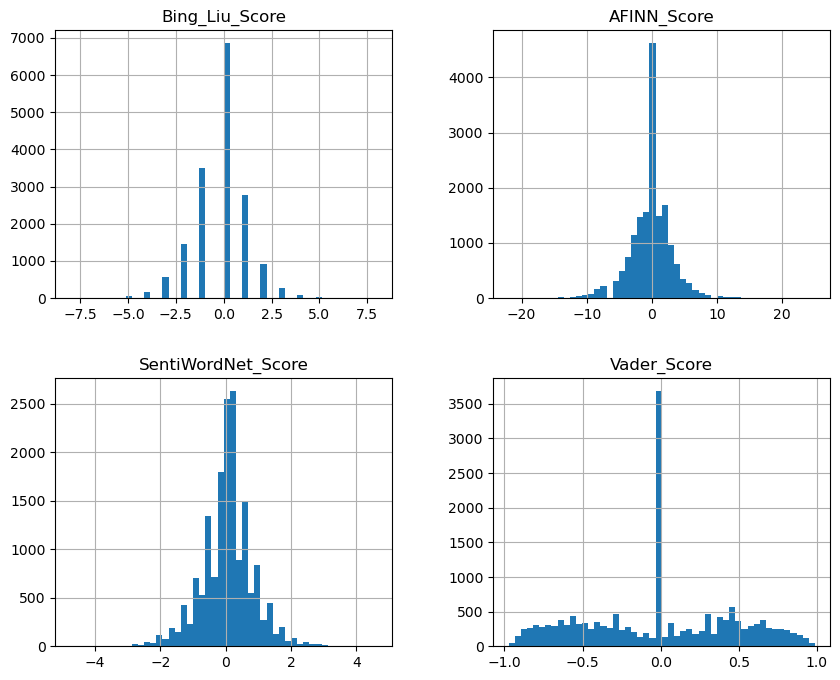

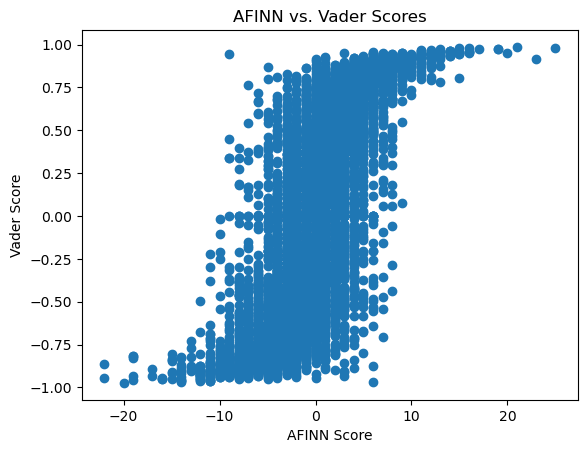

In [26]:
import matplotlib.pyplot as plt

# Histograms
df[['Bing_Liu_Score', 'AFINN_Score', 'SentiWordNet_Score', 'Vader_Score']].hist(bins=50, figsize=(10, 8))
plt.show()

# Scatter plot example between AFINN and Vader
plt.scatter(df['AFINN_Score'], df['Vader_Score'])
plt.xlabel('AFINN Score')
plt.ylabel('Vader Score')
plt.title('AFINN vs. Vader Scores')
plt.show()
